In [1]:
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from astropy.table import Table
from metric_tools import *
from sklearn.externals import joblib

%matplotlib inline
sns.set(style="white", color_codes=True, context="notebook", font_scale=1.4)

mainpath = '/Users/jorgetil/Astro/HITS'

In [2]:
table_file = '%s/tables/Blind14A_U_Blind15A_all_labeled.csv'\
              %(mainpath)
target_set = pd.read_csv(table_file)

#print target_set.info()

/Users/jorgetil/miniconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
target_set = target_set.set_index('internalID')

In [4]:
print target_set.shape
print np.unique(target_set.index.values).shape

print target_set.shape[0]-np.unique(target_set.ID.values).shape[0]

(2545021, 74)
(2545021,)
28924


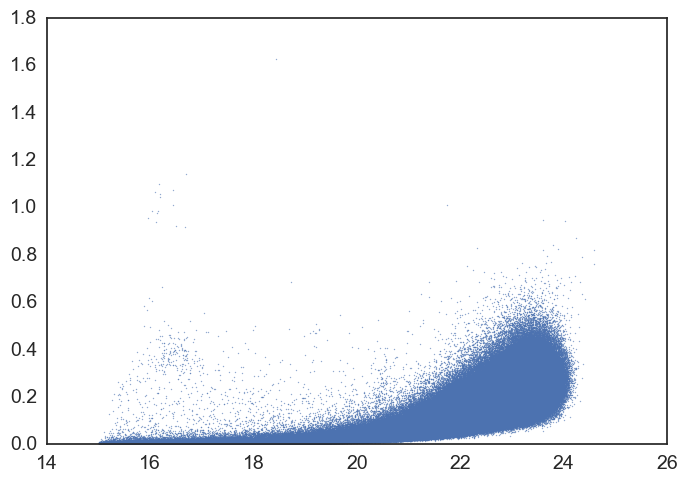

In [5]:
plt.plot(target_set.Mean, target_set.Std, 'b.', alpha=.6, ms=2)
plt.show()

In [6]:
print target_set.shape
target_set.head()

(2545021, 74)


,ID,raMedian,decMedian,X,Y,spCl,spSubCl,Var_Type,Var_subType,Amplitude,...,Rcs,Skew,SlottedA_length,SmallKurtosis,Std,StetsonK,StetsonK_AC,g-i,g-r,r-i
internalID,,,,,,,,,,,,,,,,,,,,,
Blind15A_04_N1_0200_3669,HiTS090538-001905,136.409582,-0.318287,200.331498,3669.343913,GALAXY,NaN,NaN,NaN,0.078790,...,0.215168,0.517676,0.067596,2.732353,0.041396,0.869189,0.707986,NaN,1.094824,NaN
Blind15A_04_N1_0785_2959,HiTS090525-002139,136.357786,-0.361004,785.897146,2959.838796,GALAXY,NaN,NaN,NaN,0.332484,...,0.175526,0.687568,0.067594,2.302595,0.144356,0.732197,0.489923,NaN,1.749932,NaN
Blind15A_04_N2_0800_0671,HiTS090600-002143,136.500719,-0.362118,800.812778,671.154002,GALAXY,NaN,NaN,NaN,0.344386,...,0.218243,-0.254095,0.067594,2.002224,0.182176,0.765451,0.724052,NaN,1.994532,NaN
Blind15A_04_N2_0755_2436,HiTS090631-002132,136.629492,-0.358914,755.350996,2436.162967,GALAXY,NaN,NaN,NaN,0.368528,...,0.191951,0.682832,0.067381,4.516568,0.162485,0.718453,0.557665,NaN,1.586252,NaN
Blind15A_04_N2_0159_3659,HiTS090652-001855,136.718916,-0.315376,159.415933,3659.084388,GALAXY,NaN,NaN,NaN,0.405756,...,0.336761,0.471259,0.067596,-0.063346,0.223462,0.897089,0.742705,NaN,2.168145,NaN


In [7]:
print 'original shape:', target_set.shape
cols = target_set.columns.values
FATS_feats_all = cols[9:]
FATS_feats_gr = FATS_feats_all[(FATS_feats_all != 'g-i') & (FATS_feats_all != 'r-i')]
FATS_feats_non = cols[9:-3]
print FATS_feats_all

original shape: (2545021, 74)
['Amplitude' 'AndersonDarling' 'Autocor_length' 'Beyond1Std' 'CAR_mean'
 'CAR_sigma' 'CAR_tau' 'Con' 'Eta_e' 'FluxPercentileRatioMid20'
 'FluxPercentileRatioMid35' 'FluxPercentileRatioMid50'
 'FluxPercentileRatioMid65' 'FluxPercentileRatioMid80'
 'Freq1_harmonics_amplitude_0' 'Freq1_harmonics_amplitude_1'
 'Freq1_harmonics_amplitude_2' 'Freq1_harmonics_amplitude_3'
 'Freq1_harmonics_rel_phase_0' 'Freq1_harmonics_rel_phase_1'
 'Freq1_harmonics_rel_phase_2' 'Freq1_harmonics_rel_phase_3'
 'Freq2_harmonics_amplitude_0' 'Freq2_harmonics_amplitude_1'
 'Freq2_harmonics_amplitude_2' 'Freq2_harmonics_amplitude_3'
 'Freq2_harmonics_rel_phase_0' 'Freq2_harmonics_rel_phase_1'
 'Freq2_harmonics_rel_phase_2' 'Freq2_harmonics_rel_phase_3'
 'Freq3_harmonics_amplitude_0' 'Freq3_harmonics_amplitude_1'
 'Freq3_harmonics_amplitude_2' 'Freq3_harmonics_amplitude_3'
 'Freq3_harmonics_rel_phase_0' 'Freq3_harmonics_rel_phase_1'
 'Freq3_harmonics_rel_phase_2' 'Freq3_harmonics_rel_p

In [8]:
target_set_non = target_set.dropna(subset=FATS_feats_non)
target_set_non = target_set_non[target_set_non.Var_Type.isnull()]
target_set_non.sort_index(inplace=True)

target_set_all = target_set.dropna(subset=FATS_feats_all)
target_set_all = target_set_all[target_set_all.Var_Type.isnull()]
target_set_all.sort_index(inplace=True)

In [9]:
print len(FATS_feats_all)

65


In [10]:
RFC_variables = joblib.load('%s/models/RFC_variable_nonQSO_DA.pkl' % (mainpath))
RFC_periodics = joblib.load('%s/models/RFC_periodics_nonperiodic_DA.pkl' % (mainpath))
RFC_subPer = joblib.load('%s/models/RFC_periodics_subclasses_DA.pkl' % (mainpath))
RFC_subNonPer = joblib.load('%s/models/RFC_nonperiodics_subclasses_DA.pkl' % (mainpath))

In [16]:
feat_imp = pd.DataFrame(np.array([FATS_feats_non, RFC_subNonPer.feature_importances_]).T,
                        columns=['feat_name','feat_score'])
feat_imp.sort_values('feat_score', ascending=False).head(10)

,feat_name,feat_score
39,LinearTrend,0.0734407
2,Autocor_length,0.0679641
0,Amplitude,0.0514052
53,Psi_eta,0.0489767
55,Rcs,0.044822
49,PeriodLS,0.0384035
17,Freq1_harmonics_amplitude_3,0.0370569
42,Meanvariance,0.0365344
54,Q31,0.0358069
15,Freq1_harmonics_amplitude_1,0.0346048


In [115]:
use_feat = FATS_feats_non
use_model = RFC_variables
use_set = target_set_non

Pred_Var_Type = []
prob_target = []
chunks = range(0,len(use_set), 100000)

for kk in range(len(chunks)-1):
    print chunks[kk],':',chunks[kk+1],'|',
    Pred_Var_Type__ = use_model.predict(use_set.iloc[chunks[kk]:chunks[kk+1]][use_feat])
    prob_target__ = use_model.predict_proba(use_set.iloc[chunks[kk]:chunks[kk+1]][use_feat])
    Pred_Var_Type.extend(Pred_Var_Type__)
    prob_target.extend(prob_target__)
    #if kk == 1: break
        
print chunks[kk+1],':',len(use_set)
Pred_Var_Type__ = use_model.predict(use_set.iloc[chunks[kk+1]:][use_feat])
prob_target__ = use_model.predict_proba(use_set.iloc[chunks[kk+1]:][use_feat])
Pred_Var_Type.extend(Pred_Var_Type__)
prob_target.extend(prob_target__)

pred_class = np.asarray(Pred_Var_Type)
pred_proba = np.asarray(prob_target)

0 : 100000 | 100000 : 200000 | 200000 : 300000 | 300000 : 400000 | 400000 : 500000 | 500000 : 600000 | 600000 : 700000 | 700000 : 800000 | 800000 : 900000 | 900000 : 1000000 | 1000000 : 1100000 | 1100000 : 1200000 | 1200000 : 1300000 | 1300000 : 1400000 | 1400000 : 1500000 | 1500000 : 1600000 | 1600000 : 1700000 | 1700000 : 1800000 | 1800000 : 1900000 | 1900000 : 2000000 | 2000000 : 2100000 | 2100000 : 2200000 | 2200000 : 2300000 | 2300000 : 2400000 | 2400000 : 2500000 | 2500000 : 2536100


In [116]:
prob_target_var = pd.DataFrame(pred_proba[:,1], index=use_set.index, columns=['Var_prob'])
prob_target_var.loc[pred_class==0,'Pred_Var_Type_05'] = 'NonVar'
prob_target_var.loc[pred_class==1,'Pred_Var_Type_05'] = 'Var'
#prob_target.to_csv('%s/tables/Blind15A_all_candidates_from_RFC_multi_DAall_bcw.csv'
#                        % (mainpath))
#prob_target_var['Pred_Var_Type_06'] = 'NonVar'
#prob_target_var.loc[prob_target_var.Var_prob>=.6,'Pred_Var_Type_06'] = 'Var'
#prob_target_var['Pred_Var_Type_07'] = 'NonVar'
#prob_target_var.loc[prob_target_var.Var_prob>=.7,'Pred_Var_Type_07'] = 'Var'

prob_target_var.head()

,Var_prob,Pred_Var_Type_05
internalID,,
Blind14A_01_N10_0080_2020,0.000000,NonVar
Blind14A_01_N10_0151_0857,0.007529,NonVar
Blind14A_01_N10_0169_1107,0.000000,NonVar
Blind14A_01_N10_0251_2356,0.000000,NonVar
Blind14A_01_N10_0280_0759,0.007529,NonVar


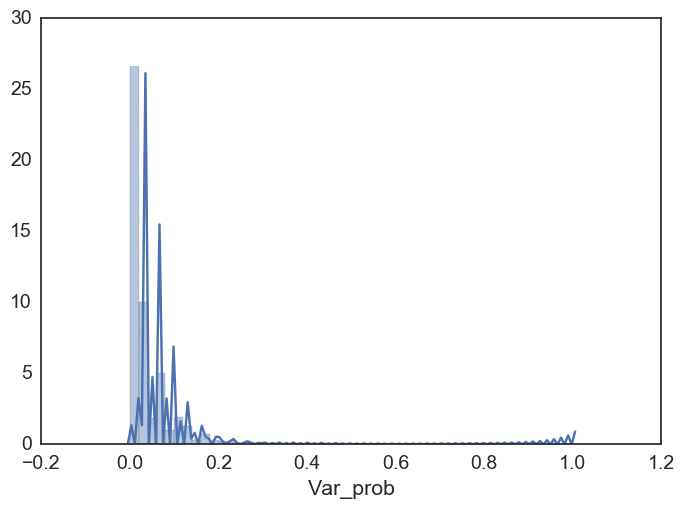

In [117]:
sns.distplot(prob_target_var.Var_prob, norm_hist=True)
plt.show()

print prob_target_var.Pred_Var_Type_05.value_counts()
print 'Var/total: %f' % (len(prob_target_var[prob_target_var.Var_prob.values >= .15])/float(len(prob_target_var)))

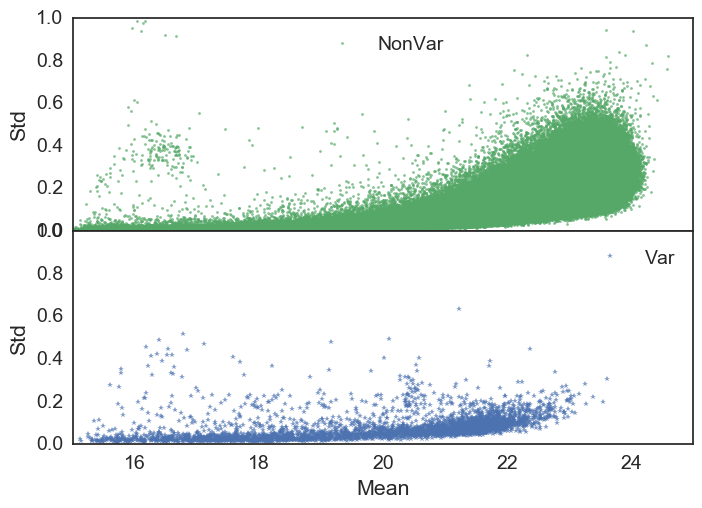

In [89]:
fig, ax = plt.subplots(2, sharex=True)
ax[0].plot(use_set[prob_target_var.Var_prob < .5].Mean, 
           use_set[prob_target_var.Var_prob < .5].Std, 'g.', alpha=.7, ms=4, label='NonVar')
ax[1].plot(use_set[prob_target_var.Var_prob >= .5].Mean, 
           use_set[prob_target_var.Var_prob >= .5].Std, 'b*', alpha=.7, ms=4, label='Var')
ax[0].legend(loc='best')
ax[1].legend(loc='best')
plt.xlabel('Mean')
ax[0].set_ylabel('Std')
ax[1].set_ylabel('Std')
ax[0].set_ylim(0,1)
ax[1].set_ylim(0,1)
plt.xlim(15,25)
fig.subplots_adjust(hspace=0)
plt.show()

In [90]:
var_only = use_set[prob_target_var.Var_prob.values >= .5]
Pred_Var_Type = []
prob_target = []
chunks = range(0,len(var_only), 1000)

for kk in range(len(chunks)-1):
    print chunks[kk],':',chunks[kk+1],'|',
    Pred_Var_Type__ = RFC_periodics.predict(var_only.iloc[chunks[kk]:chunks[kk+1]][use_feat])
    prob_target__ = RFC_periodics.predict_proba(var_only.iloc[chunks[kk]:chunks[kk+1]][use_feat])
    Pred_Var_Type.extend(Pred_Var_Type__)
    prob_target.extend(prob_target__)
    #if kk == 1: break
        
print chunks[kk+1],':',len(var_only)
Pred_Var_Type__ = RFC_periodics.predict(var_only.iloc[chunks[kk+1]:][use_feat])
prob_target__ = RFC_periodics.predict_proba(var_only.iloc[chunks[kk+1]:][use_feat])
Pred_Var_Type.extend(Pred_Var_Type__)
prob_target.extend(prob_target__)

per_pred_class = np.asarray(Pred_Var_Type)
per_pred_proba = np.asarray(prob_target)

0 : 1000 | 1000 : 2000 | 2000 : 3000 | 3000 : 3485


In [91]:
prob_target_per = pd.DataFrame(per_pred_proba[:,1], index=var_only.index, columns=['Per_prob'])
prob_target_per.loc[per_pred_class==0,'Pred_VarPer_Type'] = 'NonPer'
prob_target_per.loc[per_pred_class==1,'Pred_VarPer_Type'] = 'Per'
#prob_target.to_csv('%s/tables/Blind15A_all_candidates_from_RFC_multi_DAall_bcw.csv'
#                        % (mainpath))
prob_target_per.head()

,Per_prob,Pred_VarPer_Type
internalID,,
Blind14A_01_N12_1167_0505,0.290254,NonPer
Blind14A_01_N15_0266_3363,0.859639,Per
Blind14A_01_N16_1534_3296,0.365515,NonPer
Blind14A_01_N1_1518_2487,0.815405,Per
Blind14A_01_S10_0178_0513,0.559639,Per


NonPer    2169
Per       1316
Name: Pred_VarPer_Type, dtype: int64


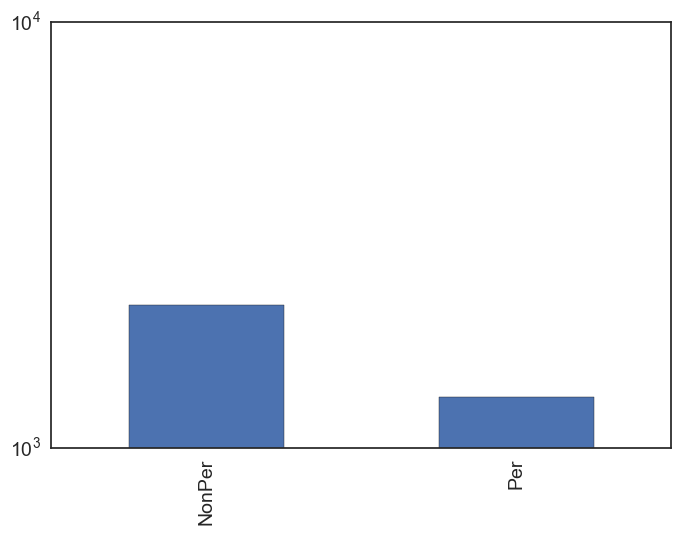

In [92]:
print prob_target_per.Pred_VarPer_Type.value_counts()
prob_target_per.Pred_VarPer_Type.value_counts().plot(kind="bar")
plt.yscale('log')
plt.show()

In [93]:
prob_target_per.query('Pred_VarPer_Type == "Per"').shape

(1316, 2)

In [94]:
per_only = use_set.loc[prob_target_per.query('Pred_VarPer_Type == "Per"').index]
print per_only.shape

Pred_Var_Type = RFC_subPer.predict(per_only[FATS_feats_non])
prob_target = RFC_subPer.predict_proba(per_only[FATS_feats_non])

subper_pred_class = np.asarray(Pred_Var_Type)
subper_pred_proba = np.asarray(prob_target)

(1316, 74)


In [95]:
prob_target_subper = pd.DataFrame(subper_pred_proba, index=per_only.index, columns=RFC_subPer.classes_)
prob_target_subper['Pred_VarPerSub_Type'] = subper_pred_class
#prob_target.to_csv('%s/tables/Blind15A_all_candidates_from_RFC_multi_DAall_bcw.csv'
#                        % (mainpath))
prob_target_subper.head()

,DSCT,EB,ROTVAR,RRLYR,Pred_VarPerSub_Type
internalID,,,,,
Blind14A_01_N15_0266_3363,0.050,0.100,0.000,0.850,RRLYR
Blind14A_01_N1_1518_2487,0.025,0.450,0.275,0.250,EB
Blind14A_01_S10_0178_0513,0.050,0.100,0.025,0.825,RRLYR
Blind14A_01_S11_1315_0421,0.025,0.700,0.175,0.100,EB
Blind14A_01_S12_0227_2003,0.075,0.175,0.050,0.700,RRLYR


ROTVAR    654
EB        372
RRLYR     195
DSCT       95
Name: Pred_VarPerSub_Type, dtype: int64


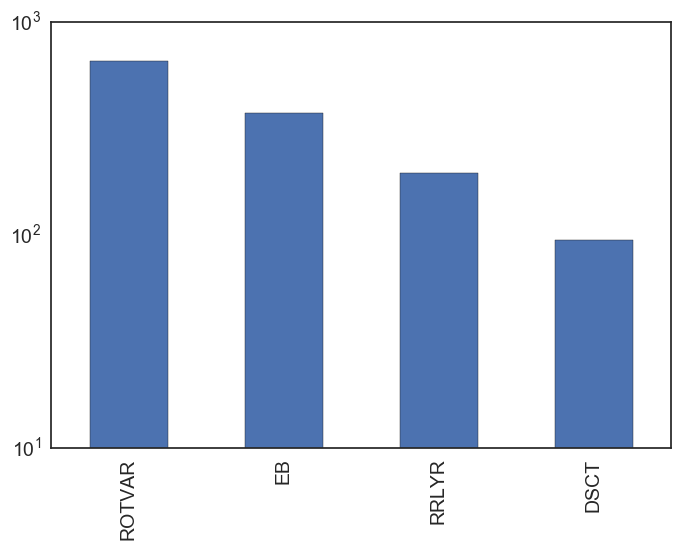

In [96]:
print prob_target_subper.Pred_VarPerSub_Type.value_counts()
prob_target_subper.Pred_VarPerSub_Type.value_counts().plot(kind="bar")
plt.yscale('log')
plt.show()

In [97]:
Nper_only = use_set.loc[prob_target_per.query('Pred_VarPer_Type == "NonPer"').index]
print Nper_only.shape

Pred_Var_Type = RFC_subNonPer.predict(Nper_only[FATS_feats_non])
prob_target = RFC_subNonPer.predict_proba(Nper_only[FATS_feats_non])

subNonper_pred_class = np.asarray(Pred_Var_Type)
subNonper_pred_proba = np.asarray(prob_target)

(2169, 74)


In [98]:
prob_target_subNonper = pd.DataFrame(subNonper_pred_proba, index=Nper_only.index, columns=RFC_subNonPer.classes_)
prob_target_subNonper['Pred_VarNonPerSub_Type'] = subNonper_pred_class
#prob_target.to_csv('%s/tables/Blind15A_all_candidates_from_RFC_multi_DAall_bcw.csv'
#                        % (mainpath))
prob_target_subNonper.head()

,CV,QSO,SNe,Pred_VarNonPerSub_Type
internalID,,,,
Blind14A_01_N12_1167_0505,0.450000,0.550000,0.000,QSO
Blind14A_01_N16_1534_3296,0.243050,0.606950,0.150,QSO
Blind14A_06_N20_1117_0061,0.100000,0.900000,0.000,QSO
Blind14A_08_S24_1977_2143,0.209848,0.665152,0.125,QSO
Blind14A_08_S29_1959_2736,0.100000,0.900000,0.000,QSO


QSO    1890
CV      250
SNe      29
Name: Pred_VarNonPerSub_Type, dtype: int64


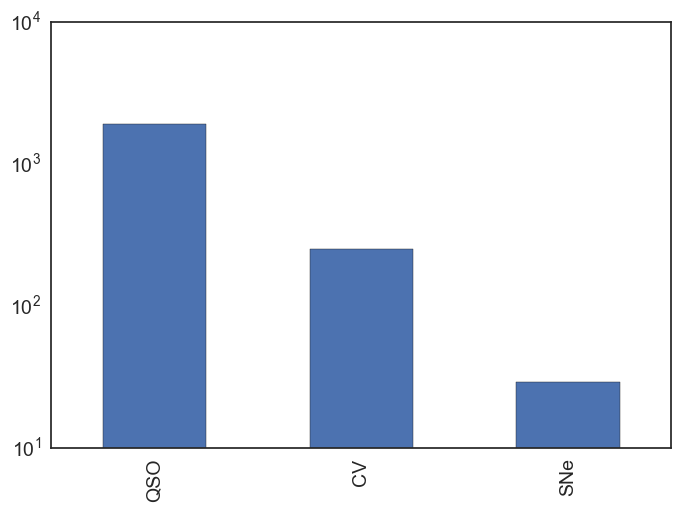

In [99]:
print prob_target_subNonper.Pred_VarNonPerSub_Type.value_counts()
prob_target_subNonper.Pred_VarNonPerSub_Type.value_counts().plot(kind="bar")
plt.yscale('log')
plt.show()

In [100]:
print prob_target_var.shape 
print prob_target_per.shape 
print prob_target_subper.shape 
print prob_target_subNonper.shape

(2536100, 2)
(3485, 2)
(1316, 5)
(2169, 4)


In [101]:
final_df = pd.concat([prob_target_var, prob_target_per, prob_target_subper, prob_target_subNonper],
                     join='outer', axis=1)
print target_set_non.shape
print final_df.shape

(2536100, 74)
(2536100, 13)


In [102]:
final_df.fillna('', inplace=True)
final_df['Pred_class'] = final_df[['Pred_VarPerSub_Type',
                                   'Pred_VarNonPerSub_Type']].astype(str).sum(axis=1)
final_df['Pred_class'].replace('', 'NV', inplace=True)
final_df.replace('', np.nan, inplace=True)

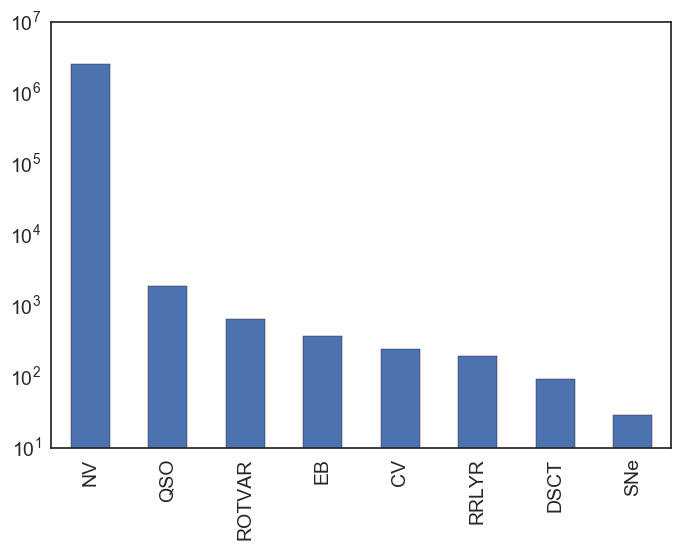

In [103]:
final_df.Pred_class.value_counts().plot(kind="bar")
plt.yscale('log')
plt.show()

In [104]:
final_df.Pred_class.value_counts()

NV        2532615
QSO          1890
ROTVAR        654
EB            372
CV            250
RRLYR         195
DSCT           95
SNe            29
Name: Pred_class, dtype: int64

In [105]:
final_df.head()

,Var_prob,Pred_Var_Type_05,Per_prob,Pred_VarPer_Type,DSCT,EB,ROTVAR,RRLYR,Pred_VarPerSub_Type,CV,QSO,SNe,Pred_VarNonPerSub_Type,Pred_class
Blind14A_01_N10_0080_2020,0.000000,NonVar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NV
Blind14A_01_N10_0151_0857,0.007529,NonVar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NV
Blind14A_01_N10_0169_1107,0.000000,NonVar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NV
Blind14A_01_N10_0251_2356,0.000000,NonVar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NV
Blind14A_01_N10_0280_0759,0.007529,NonVar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NV


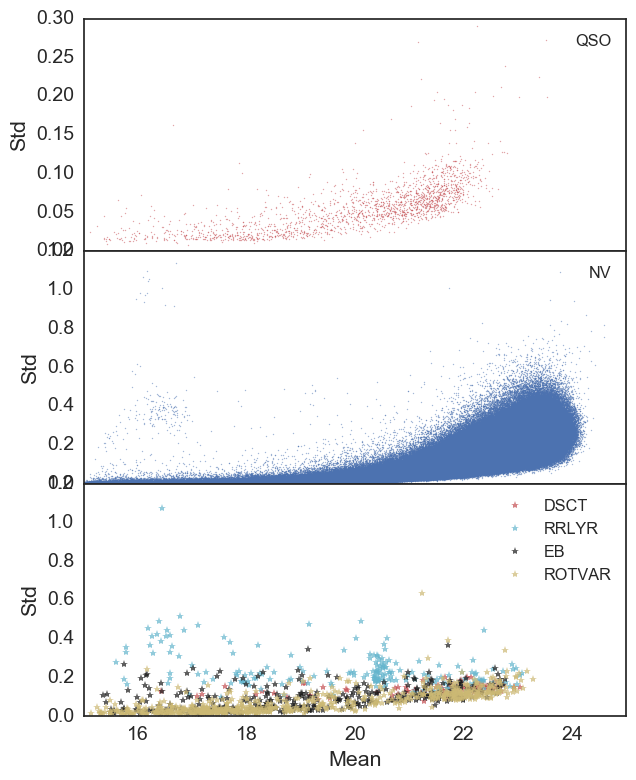

In [106]:
fig, ax = plt.subplots(3, sharex=True, figsize=(7,9))
ax[0].plot(use_set[final_df.Pred_class=='QSO'].Mean, 
       use_set[final_df.Pred_class=='QSO'].Std, 'r.', alpha=.5, ms=2, label='QSO')
ax[1].plot(use_set[final_df.Pred_class=='NV'].Mean, 
           use_set[final_df.Pred_class=='NV'].Std, 'b.', alpha=.5, ms=2, label='NV')
ax[2].plot(use_set[final_df.Pred_class=='DSCT'].Mean, 
               use_set[final_df.Pred_class=='DSCT'].Std, 'r*', alpha=.7, ms=6, label='DSCT')
ax[2].plot(use_set[final_df.Pred_class=='RRLYR'].Mean, 
         use_set[final_df.Pred_class=='RRLYR'].Std, 'c*', alpha=.7, ms=6, label='RRLYR')
ax[2].plot(use_set[final_df.Pred_class=='EB'].Mean, 
         use_set[final_df.Pred_class=='EB'].Std, 'k*', alpha=.7, ms=6, label='EB')
ax[2].plot(use_set[final_df.Pred_class=='ROTVAR'].Mean, 
         use_set[final_df.Pred_class=='ROTVAR'].Std, 'y*', alpha=.7, ms=6, label='ROTVAR')
ax[0].legend(loc='best', fontsize='x-small')
ax[1].legend(loc='best', fontsize='x-small')
ax[2].legend(loc='best', fontsize='x-small')
plt.xlabel('Mean')
ax[0].set_ylabel('Std')
ax[1].set_ylabel('Std')
ax[2].set_ylabel('Std')
plt.xlim(15,25)
fig.subplots_adjust(hspace=0)
plt.show()

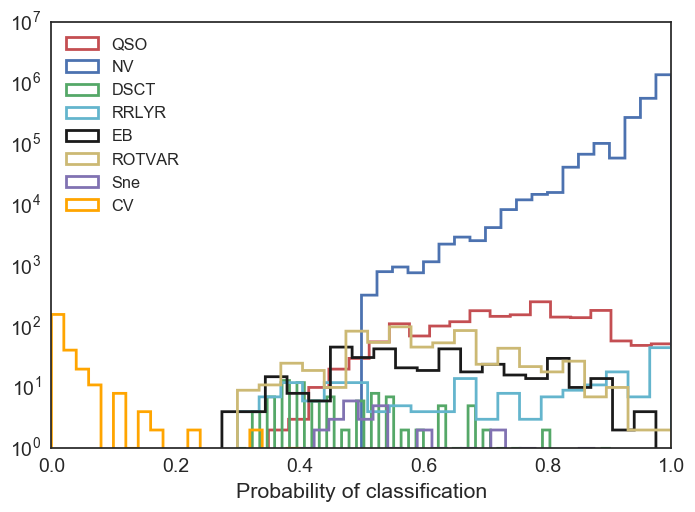

In [107]:
plt.hist(final_df.query('Pred_class=="QSO"').QSO.values,
         bins=20, histtype='step', color='r', lw=2, label='QSO')
plt.hist(1-final_df.query('Pred_class=="NV"').Var_prob.values,
         bins=20, histtype='step', color='b', lw=2, label='NV')
plt.hist(final_df.query('Pred_class=="DSCT"').DSCT.values,
         bins=50, histtype='step', color='g', lw=2, label='DSCT')
plt.hist(final_df.query('Pred_class=="RRLYR"').RRLYR.values,
         bins=20, histtype='step', color='c', lw=2, label='RRLYR')
plt.hist(final_df.query('Pred_class=="EB"').EB.values,
         bins=20, histtype='step', color='k', lw=2, label='EB')
plt.hist(final_df.query('Pred_class=="ROTVAR"').ROTVAR.values,
         bins=20, histtype='step', color='y', lw=2, label='ROTVAR')
plt.hist(final_df.query('Pred_class=="SNe"').SNe.values,
         bins=20, histtype='step', color='m', lw=2, label='Sne')
plt.hist(final_df.query('Pred_class=="CV"').SNe.values,
         bins=20, histtype='step', color='orange', lw=2, label='CV')
plt.xlabel('Probability of classification')
plt.legend(loc='upper left', fontsize='x-small')
plt.yscale('log')
plt.show()

In [108]:
final_df.head()

,Var_prob,Pred_Var_Type_05,Per_prob,Pred_VarPer_Type,DSCT,EB,ROTVAR,RRLYR,Pred_VarPerSub_Type,CV,QSO,SNe,Pred_VarNonPerSub_Type,Pred_class
Blind14A_01_N10_0080_2020,0.000000,NonVar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NV
Blind14A_01_N10_0151_0857,0.007529,NonVar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NV
Blind14A_01_N10_0169_1107,0.000000,NonVar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NV
Blind14A_01_N10_0251_2356,0.000000,NonVar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NV
Blind14A_01_N10_0280_0759,0.007529,NonVar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NV


In [109]:
final_df.to_csv('%s/tables/HiTS_all_candidates_from_RFC_hierar_var5.csv'
                        % (mainpath))

### Extra stuf

In [216]:
best = []
df_best_proba = []
for k,label in enumerate(set(final_df.Pred_class.values)):
    print '\r' ,label,
    if label != 'NV':
        idx = final_df.query('Pred_class=="%s"' % (label)).nlargest(100, '%s' % label)[label].index.values
        idx_2 = final_df.query('Pred_class=="%s"' % (label)).nlargest(5, '%s' % label)[label].index.values
        prob = final_df.query('Pred_class=="%s"' % (label)).nlargest(100, '%s' % label)[label].values
        prob_2 = final_df.query('Pred_class=="%s"' % (label)).nlargest(5, '%s' % label)[label].values
    else:
        idx = final_df.query('Pred_class=="%s"' % (label)).nsmallest(100, 'Var_prob')['Var_prob'].index.values
        idx_2 = final_df.query('Pred_class=="%s"' % (label)).nsmallest(5, 'Var_prob')['Var_prob'].index.values
        prob = 1 - final_df.query('Pred_class=="%s"' % (label)).nsmallest(100, 'Var_prob')['Var_prob'].values
        prob_2 = 1 - final_df.query('Pred_class=="%s"' % (label)).nsmallest(5, 'Var_prob')['Var_prob'].values
    aux = target_set_non.loc[idx]
    aux['Pred_Var_Type'] = label
    aux['Pred_proba'] = prob
    best.append(aux)
    aux_2 = final_df.loc[idx_2]
    aux_2['Pred_Var_Type'] = label
    aux_2['Pred_proba'] = prob_2 
    df_best_proba.append(aux_2)
best_pred = pd.concat(best, axis=0)
df_best_proba = pd.concat(df_best_proba, axis=0)

NV


In [238]:
latex_cols = ['Var_prob', 'Per_prob', 'DSCT', 'EB', 
        'ROTVAR', 'RRLYR', 'CV', 'QSO', 'SNe', 
        'Pred_Var_Type']
df_best_proba.replace('', np.nan, inplace=True)
to_latex = df_best_proba.round(decimals=3)
to_latex.fillna('', inplace=True)
to_latex = pd.merge(to_latex, target_set.ID.to_frame(), how='left', left_index=True, right_index=True)
to_latex.set_index('ID', inplace=True)
#to_latex.drop('internalID', axis=1, inplace=True)
to_latex[latex_cols]

,Var_prob,Per_prob,DSCT,EB,ROTVAR,RRLYR,CV,QSO,SNe,Pred_Var_Type
ID,,,,,,,,,,
HiTS100614+021838,0.625,0.179,,,,,0,0.1,0.9,SNe
HiTS102707-012229,0.518,0.274,,,,,0,0.1,0.9,SNe
HiTS103624-061317,0.689,0.128,,,,,0,0.1,0.9,SNe
HiTS090944-035642,0.817,0.288,,,,,0,0.2,0.8,SNe
HiTS092748+001402,0.917,0.305,,,,,0,0.2,0.8,SNe
HiTS095158-022703,0.587,0.526,0.887,0.014,0.063,0.036,,,,DSCT
HiTS093337-021826,0.372,0.529,0.83,0.06,0.04,0.07,,,,DSCT
HiTS100232+022627,0.544,0.515,0.82,0.06,0.07,0.05,,,,DSCT
HiTS091153+013412,0.660,0.765,0.81,0.107,0.04,0.043,,,,DSCT


In [229]:
print to_latex.to_latex(longtable='deluxtable', index=True, columns=latex_cols)

\begin{longtable}{lrlllllllllr}
\toprule
{} &  Var\_prob & Per\_prob &   DSCT &     EB & ROTVAR &  RRLYR &     CV &    QSO &  SNe & Pred\_Var\_Type &  Pred\_proba \\
ID                &           &          &        &        &        &        &        &        &      &               &             \\
\midrule
\endhead
\midrule
\multicolumn{3}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
HiTS100614+021838 &     0.625 &    0.179 &        &        &        &        &      0 &    0.1 &  0.9 &           SNe &       0.900 \\
HiTS102707-012229 &     0.518 &    0.274 &        &        &        &        &      0 &    0.1 &  0.9 &           SNe &       0.900 \\
HiTS103624-061317 &     0.689 &    0.128 &        &        &        &        &      0 &    0.1 &  0.9 &           SNe &       0.900 \\
HiTS090944-035642 &     0.817 &    0.288 &        &        &        &        &      0 &    0.2 &  0.8 &           SNe &       0.800 \\
HiTS092748+001402 &     0.917 &    0.305

In [237]:
best_pred.to_csv('%s/tables/HiTS_best_candidates_from_RFC_hierar.csv'
                        % (mainpath))

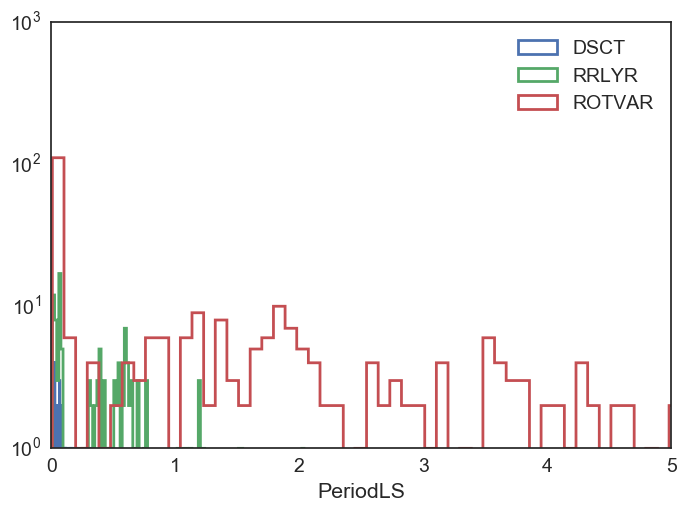

In [54]:
plt.hist(target_set.loc[final_df.query('Pred_class=="DSCT"').index.values,
                        'PeriodLS'].values, log=False, histtype='step',
         lw=2, bins=400, label='DSCT')
plt.hist(target_set.loc[final_df.query('Pred_class=="RRLYR"').index.values,
                        'PeriodLS'].values, log=False, histtype='step',
         lw=2, bins=400, label='RRLYR')
plt.hist(target_set.loc[final_df.query('Pred_class=="ROTVAR"').index.values,
                        'PeriodLS'].values, log=False, histtype='step',
         lw=2, bins=400, label='ROTVAR')
plt.yscale('log')
#plt.xscale('log')
plt.xlim(0,5)
plt.xlabel('PeriodLS')
plt.legend()
plt.show()

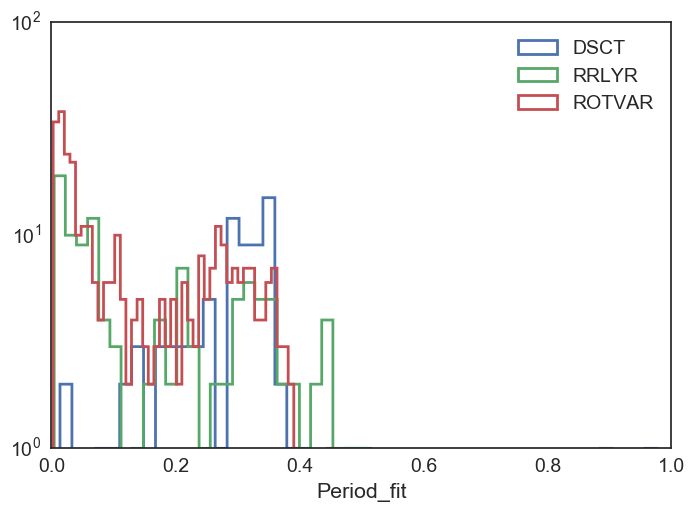

In [55]:
plt.hist(target_set.loc[final_df.query('Pred_class=="DSCT"').index.values,
                        'Period_fit'].values, log=False, histtype='step',
         lw=2, bins=50, label='DSCT')
plt.hist(target_set.loc[final_df.query('Pred_class=="RRLYR"').index.values,
                        'Period_fit'].values, log=False, histtype='step',
         lw=2, bins=50, label='RRLYR')
plt.hist(target_set.loc[final_df.query('Pred_class=="ROTVAR"').index.values,
                        'Period_fit'].values, log=False, histtype='step',
         lw=2, bins=50, label='ROTVAR')
plt.yscale('log')
#plt.xscale('log')
#plt.xlim(0,5)
plt.xlabel('Period_fit')
plt.legend()
plt.show()